In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load dataset
data = pd.read_csv('Bahria_Town_with_avg_distance.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           2954 non-null   object 
 1   price                   2954 non-null   int64  
 2   location                2954 non-null   object 
 3   latitude                2954 non-null   float64
 4   longitude               2954 non-null   float64
 5   baths                   2954 non-null   int64  
 6   bedrooms                2954 non-null   int64  
 7   purpose                 2954 non-null   object 
 8   Area Type               2954 non-null   object 
 9   Area Size               2954 non-null   float64
 10  avg_banks_distance      2954 non-null   float64
 11  avg_parks_distance      2954 non-null   float64
 12  avg_hospitals_distance  2954 non-null   float64
 13  avg_schools_distance    2954 non-null   float64
dtypes: float64(7), int64(3), object(4)
memor

In [8]:
data.isnull().sum()

property_type             0
price                     0
location                  0
latitude                  0
longitude                 0
baths                     0
bedrooms                  0
purpose                   0
Area Type                 0
Area Size                 0
avg_banks_distance        0
avg_parks_distance        0
avg_hospitals_distance    0
avg_schools_distance      0
dtype: int64

In [9]:
data.columns

Index(['property_type', 'price', 'location', 'latitude', 'longitude', 'baths',
       'bedrooms', 'purpose', 'Area Type', 'Area Size', 'avg_banks_distance',
       'avg_parks_distance', 'avg_hospitals_distance', 'avg_schools_distance'],
      dtype='object')

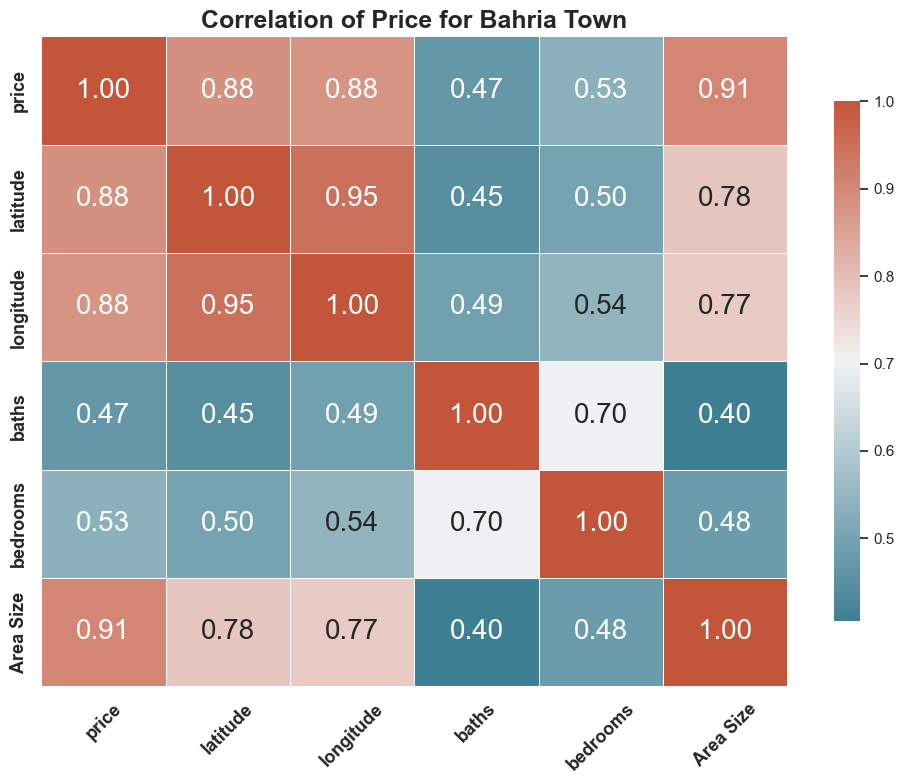

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data = data[['price', 'latitude', 'longitude', 'baths',
       'bedrooms', 'Area Size']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set a custom color palette
custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=custom_palette, 
    cbar_kws={'shrink': .8},
    linewidths=.5,
    annot_kws={"size": 20}
)

# Adding labels and title with larger font sizes and bold text
plt.title('Correlation of Price for Bahria Town', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=45)
plt.yticks(fontsize=13, fontweight='bold')

# Adjust the layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
import numpy as np

# Identify numeric columns for outlier treatment
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Handle outliers using the IQR method
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


In [12]:
# Standardize numeric columns
# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

scaler = StandardScaler()
numeric_cols = [
    'baths', 
    'bedrooms', 
    'Area Size', 
    'avg_banks_distance', 
    'avg_hospitals_distance',
    'avg_parks_distance', 
    'avg_schools_distance'
    
]    
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [13]:
# Selecting relevant features for our model
features = ['baths', 
    'bedrooms', 
    'Area Size', 
    'avg_banks_distance', 
    'avg_hospitals_distance',
    'avg_parks_distance', 
    'avg_schools_distance']

X = data[features]
y = data['price']

In [14]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create and train the Gradient Boosting Regression model
model  = GradientBoostingRegressor(random_state=0, loss='squared_error', learning_rate=0.1, n_estimators=100, criterion="friedman_mse", min_samples_split=2, min_samples_leaf=1, max_depth=3, max_features=None)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [16]:
# predict
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
score=model.score(X_test,y_test)
print(score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

0.980212111225415


In [18]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 2146012101848.0847
Root Mean Squared Error: 1464927.3367126728
R-squared: 0.980212111225415


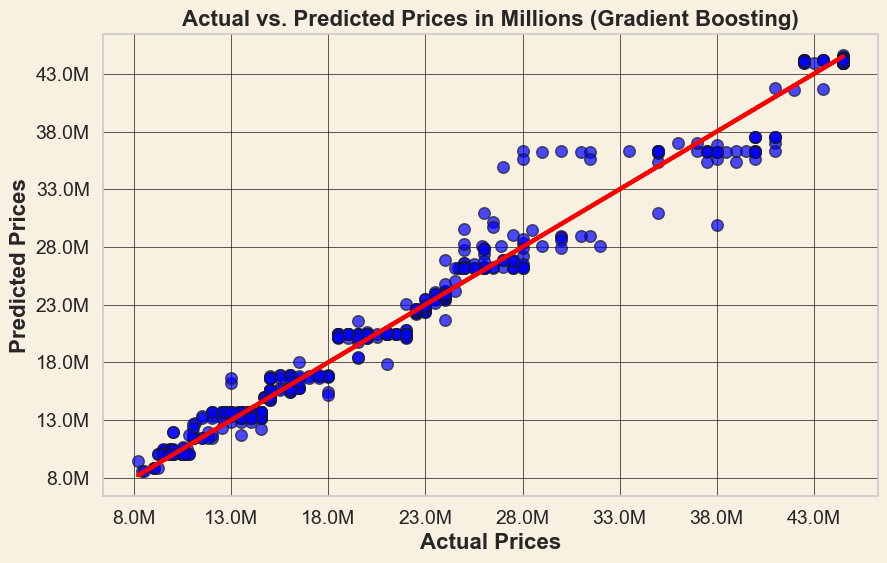

In [22]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='#F8F1E2')  # Set full background color
ax = plt.gca()  # Get current axis
ax.set_facecolor('#F8F1E2')  # Set face color for plot background

plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=70, alpha=0.7)
plt.plot(y_test, y_test, color='red', linewidth=3)

plt.xlabel('Actual Prices', fontsize=16, fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=16, fontweight='bold')
plt.title('Actual vs. Predicted Prices in Millions (Gradient Boosting)', fontsize=16, fontweight='bold')

# Set x-axis and y-axis ticks
x_ticks = np.arange (8000000, 45000000, 5000000)
y_ticks = np.arange(8000000, 45000000, 5000000)
plt.xticks(x_ticks, labels=[f'{label / 1e6:.1f}M' for label in x_ticks], fontsize=14)
plt.yticks(y_ticks, labels=[f'{label / 1e6:.1f}M' for label in y_ticks], fontsize=14)

# Add grid
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.9)

plt.show()


In [ ]:
# print actual and predicted values and save it in a new cvs file
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.to_csv('updated_gradient_boosting.csv', index=False)

In [ ]:
# New cell for user input
print("Enter the following values to predict house price:")
baths = float(input("Number of baths: "))
bedrooms = float(input("Number of bedrooms: "))
area_size = float(input("Area Size (in Marla): "))
avg_distance_to_Banks = float(input("avg_distance_to_Banks: "))
avg_distance_to_Hospitals = float(input("avg_distance_to_Hospitals: "))
avg_distance_to_Parks = float(input("avg_distance_to_Parks: "))
avg_distance_to_Schools = float(input("avg_distance_to_Schools: "))



# Create a dataframe with the user inputs
user_input = pd.DataFrame({
    'baths': [baths],
    'bedrooms': [bedrooms],
    'Area Size': [area_size],
    'avg_distance_to_Banks': [avg_distance_to_Banks],
    'avg_distance_to_Hospitals': [avg_distance_to_Hospitals],
    'avg_distance_to_Parks': [avg_distance_to_Parks],
    'avg_distance_to_Schools': [avg_distance_to_Schools]
})

# Standardize the user inputs using the same scaler
user_input_scaled = scaler.transform(user_input)

# Predict the price using the trained model
predicted_price = model.predict(user_input_scaled)

print(f"The predicted price for the entered house features is: {predicted_price[0]}")

Enter the following values to predict house price:


ValueError: could not convert string to float: ''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Bahria_Town_Updated.csv')

In [ ]:
df.columns

Index(['property_type', 'price', 'location', 'latitude', 'longitude', 'baths',
       'bedrooms', 'purpose', 'Area Type', 'Area Size', 'avg_banks_distance',
       'avg_parks_distance', 'avg_hospitals_distance', 'avg_schools_distance'],
      dtype='object')

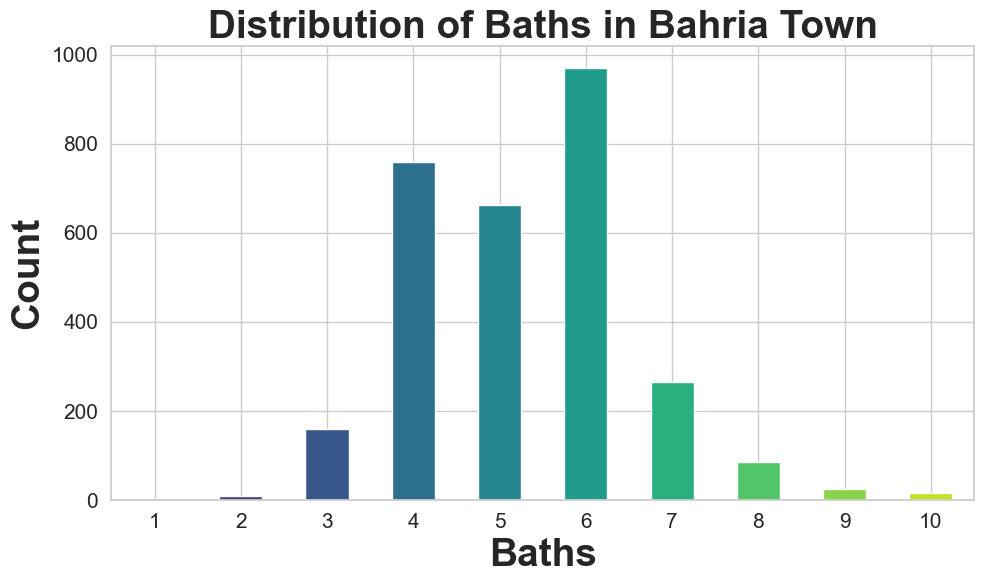

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data on baths and bedrooms

# Set a custom color palette
custom_palette = sns.color_palette("viridis", n_colors=len(df['baths'].unique()))

# Create the bar plot with the custom palette for baths
sns.set(style="whitegrid")
plot = df.groupby('baths').size().plot(
    kind='bar',
    color=custom_palette,
    figsize=(10, 6),
    fontsize=12
)

# Customize the plot for baths
plot.set_title("Distribution of Baths in Bahria Town", fontsize=28, fontweight='bold')
plot.set_xlabel("Baths", fontsize=28, fontweight='bold')
plot.set_ylabel("Count", fontsize=28, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks( rotation=0, fontsize=15)
plt.yticks( fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()




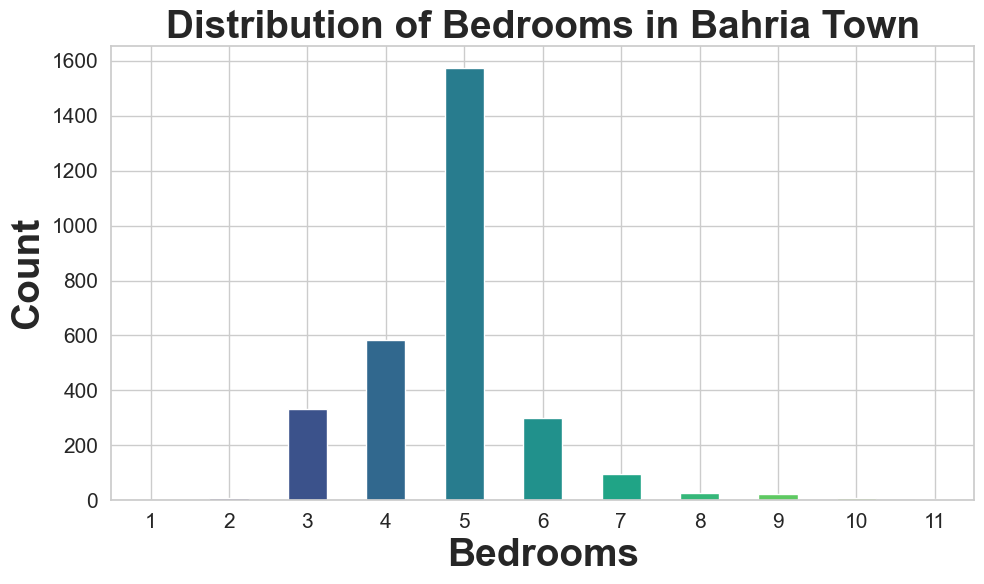

In [ ]:
# Set a custom color palette for bedrooms
custom_palette = sns.color_palette("viridis", n_colors=len(df['bedrooms'].unique()))

# Create the bar plot with the custom palette for bedrooms
sns.set(style="whitegrid")
plot = df.groupby('bedrooms').size().plot(
    kind='bar',
    color=custom_palette,
    figsize=(10, 6),
    fontsize=12
)

# Customize the plot for bedrooms
plot.set_title("Distribution of Bedrooms in Bahria Town", fontsize=28, fontweight='bold')
plot.set_xlabel("Bedrooms", fontsize=28, fontweight='bold')
plot.set_ylabel("Count", fontsize=28, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks( rotation=0, fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


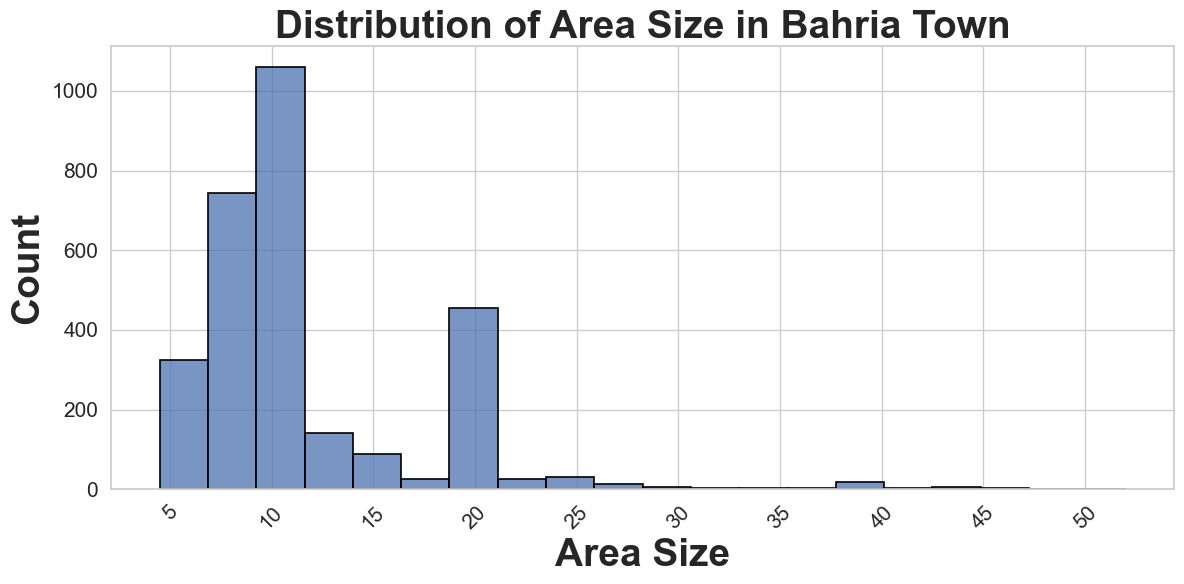

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing data on Area Size

# Calculate the range of the data
min_area_size = df['Area Size'].min()
max_area_size = df['Area Size'].max()
data_range = max_area_size - min_area_size

# Calculate the 5% padding on each side
padding = 0.05 * data_range

# Set the x-axis limits with padding
x_min = min_area_size - padding
x_max = max_area_size + padding

# Create ticks with a difference of 5
x_ticks = np.arange(np.floor(x_min / 5) * 5, np.ceil(x_max / 5) * 5 + 5, 5)

# Create a histogram for Area Size with bins
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Area Size', bins=20, kde=False, edgecolor='black', linewidth=1.2)
plt.title('Distribution of Area Size in Bahria Town', fontsize=28, fontweight='bold')
plt.xlabel('Area Size', fontsize=28, fontweight='bold')
plt.ylabel('Count', fontsize=28, fontweight='bold')
plt.xticks(x_ticks, rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(x_min, x_max)  # Set x-axis limits with padding
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\shaje\AppData\Local\Temp\ipykernel_3536\4012366786.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='property_type', data=df, palette='viridis')


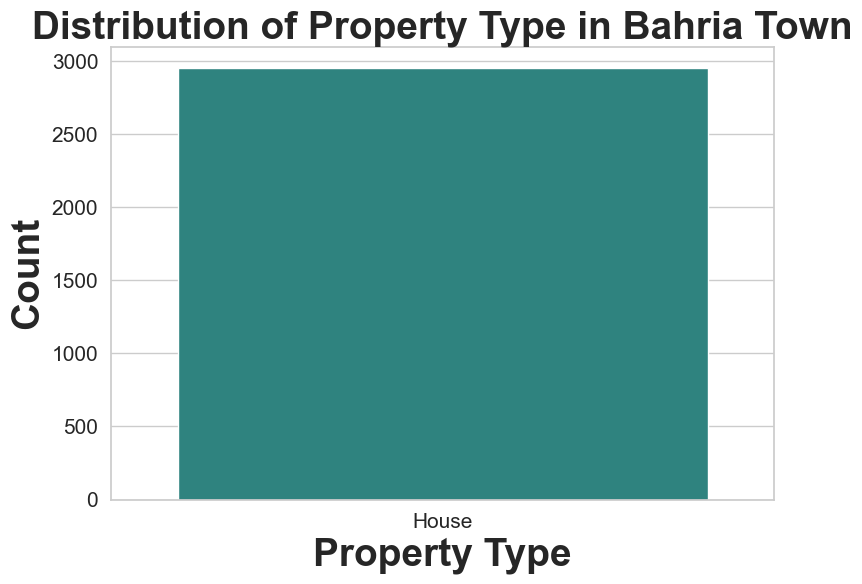

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data on property_type (only 'House')

# Create the plot for Property Type (House)
plt.figure(figsize=(8, 6))
sns.countplot(x='property_type', data=df, palette='viridis')
plt.title('Distribution of Property Type in Bahria Town', fontsize=28, fontweight='bold')
plt.xlabel('Property Type', fontsize=28, fontweight='bold')
plt.ylabel('Count', fontsize=28, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)# Adjust x-axis label font size for readability
plt.tight_layout()

# Show the plot
plt.show()


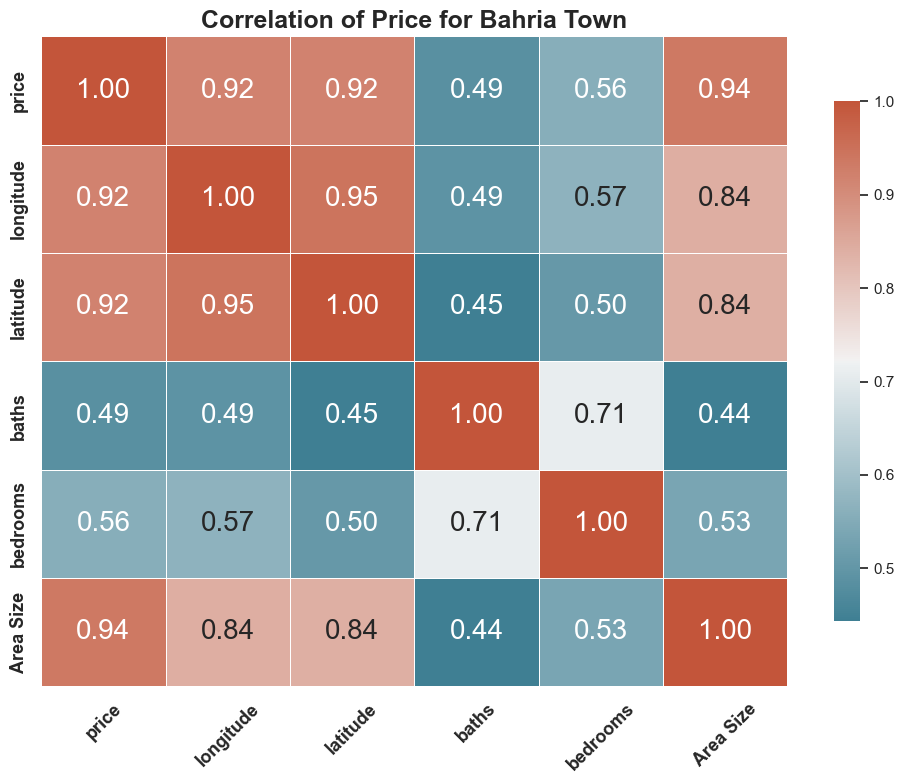

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data = data[['price', 'longitude', 'latitude', 'baths', 'bedrooms', 'Area Size']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set a custom color palette
custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=custom_palette, 
    cbar_kws={'shrink': .8},
    linewidths=.5,
    annot_kws={"size": 20}
)

# Adding labels and title with larger font sizes and bold text
plt.title('Correlation of Price for Bahria Town', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=45)
plt.yticks(fontsize=13, fontweight='bold')

# Adjust the layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


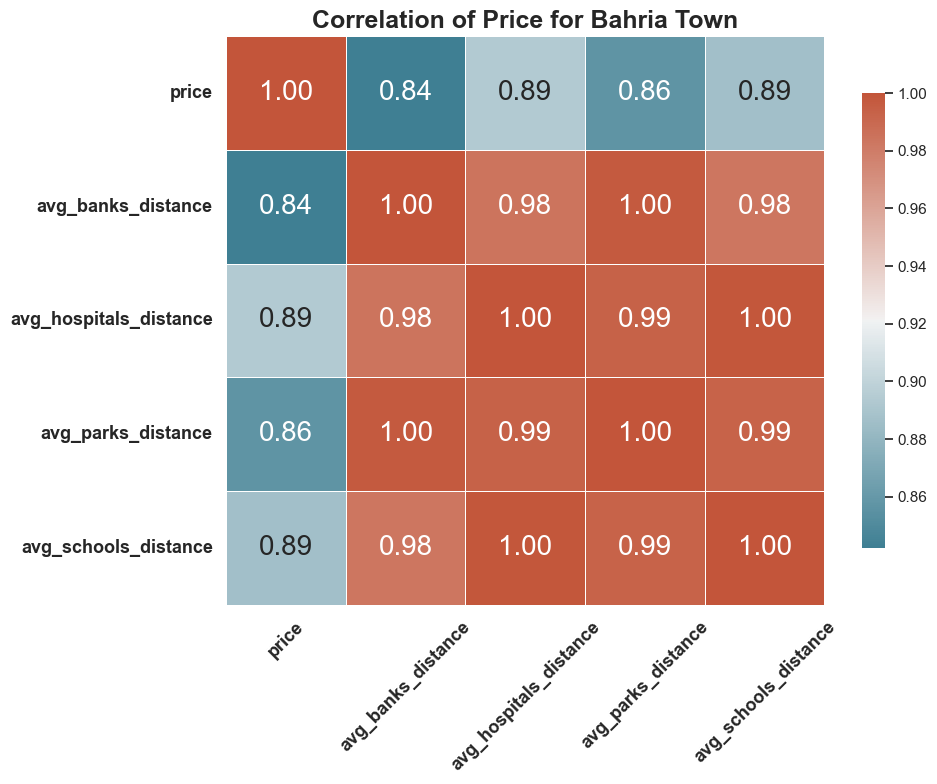

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_data = data[['price', 'avg_banks_distance', 
    'avg_hospitals_distance',
    'avg_parks_distance', 
    'avg_schools_distance']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set a custom color palette
custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=custom_palette, 
    cbar_kws={'shrink': .8},
    linewidths=.5,
    annot_kws={"size": 20}
)

# Adding labels and title with larger font sizes and bold text
plt.title('Correlation of Price for Bahria Town', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=45)
plt.yticks(fontsize=13, fontweight='bold')

# Adjust the layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()
